# 텐서플로 기초

> 인공지능의 겨울(AI Winter) 이라 불리는 시기가 두 차례 있었는데 그 중 첫 번째는 퍼셉트론의 한계를 지적한 책 **퍼셉트론**의 발간이 영향을 미쳤다.
> 
> AND, OR, XOR 연산

## 난수 Random Number
* 신경망의 초깃값을 지정해주는 것을 **초기화(Initialization)** 이라 한다.
* 현재 가장 많이 쓰이는 방법은 **Xavier 초기화(Xavier Initialization)**, **He 초기화(He Initialization)** 인데, 이 방법들은 랜덤하지만 어느 정도 규칙성이 있는 범위 내에서 난수를 지정한다.

### 균일 분포 Unifrom distribution
* 균일 분포란 최솟값과 최댓값 사이의 모든 수가 나올 확률이 동일한 분포
* tf.random.uniform() 메서드 사용
* 첫번째 인자는 결괏값의 shape, 두번째 인자는 최솟값, 세번째 인자는 최대값

In [1]:
# 텐서플로 버전 확인
import tensorflow as tf 
print(tf.__version__) 

2.0.0


In [2]:
rand = tf.random.uniform([4,2],0,1)
print(rand)

tf.Tensor(
[[0.09460342 0.43960333]
 [0.9377763  0.6561382 ]
 [0.88867474 0.8846135 ]
 [0.5330832  0.3680451 ]], shape=(4, 2), dtype=float32)


### 정규 분포 Normal Distribution
* 정규 분포는 가운데가 높고 양극단으로 갈수록 낮아지는 분포
* tf.random.normal() 메서드 사용
* 두번째 인자는 정규 분포의 평균, 세번째 인자는 정규 분포의 표준 편차
    + 평균이 0이고 표준 편차가 1일 때 표준 정규 분포라고 한다.

In [3]:
# mean = 0, std = 1
rand = tf.random.normal([4],0,1)
print(rand)

tf.Tensor([-0.40757585 -0.3489127   0.35641307  1.140465  ], shape=(4,), dtype=float32)


## 뉴런
* 입력 ➡️ 뉴런 ➡️ 출력
* 입력 x ➡️ 가중치 w ➡️ 활성화함수 f ➡️ 출력 y
* 뉴런에서 학습할 때 변하는 것은 가중치로 처음에는 초기화를 통해 랜덤한 값을 넣고 학습 과정에서 점차 일정한 값으로 수렴하게 된다.
* 학습이 잘 된다는 것은 좋은 가중치를 얻어서 원하는 출력에 점점 가까운 값을 얻는 것을 말한다.
* 활성화 함수는 시그모이드, ReLU 등이 쓰인다.
    + 신경망 초창기에는 시그모이드가 주로 쓰였으니 은닉층이 다수 사용되며 ReLU가 더 많이 쓰인다.
* 딥러닝에서 오류를 역전파(Backpropagate) 할 때 시그모이드 함수가 값이 점점 작아지는 문제로 인해 [ReLU 함수](https://www.cs.toronto.edu/~fritz/absps/reluICML.pdf)가 대안으로 제시되었다.


In [4]:
# Sigmoid activation function
import math
def sigmoid(x):
    return 1 / (1+math.exp(-x))

In [5]:
x = 1    # 입력값
y = 0    # 출력값
w = tf.random.normal([1],0,1)  # 초기 가중치

output = sigmoid(x * w)        # 예측값  
print(output)

0.5803337141450682


### 경사 하강법 Gradient Descent
* 실제 출력값(Output)과 기대 출력(y)의 차이를 에러(Error)라고 한다.
* 경사 하강법은 w에 입력과 학습률(a)과 에러를 곱해주는 방법으로 *w = w + x * a * error* 라고 나타낸다.
    + 학습률(Learning rate)는 w를 업데이트하는 정도로 큰 값으로 설정하면 학습 속도가 빠르지만 과도한 학습으로 적정 수치를 벗어날 우려가 있고 너무 작은 값은 학습 속도가 너무 느려질 수 있다.
* 경사 하강법의 경사는 손실 곡선의 기울기를 의미한다.
* 경사 하강법은 손실 곡선을 미분한 다음 그 값을 이용하여 가중치가 손실이 가장 낮아지는 지점에 도달하도록 반복적으로 계산한다.

In [6]:
# Using gradient descent to calculate output

# learning rate = 0.1
a = 0.1
# epoch = 1000
for i in range(1000): 
    output = sigmoid(x * w) 
    error = y - output
    # Training/Update
    w = w + x * a * error

    # Print only 100th result (ex i=99, 199, 299, ..., 999)
    if i % 100 == 99:
        print('반복 횟수 {0} : , 에러값 : {1}, 결과값 : {2}'.format(i, error, output))

반복 횟수 99 : , 에러값 : -0.10786565018391682, 결과값 : 0.10786565018391682
반복 횟수 199 : , 에러값 : -0.053899421926197406, 결과값 : 0.053899421926197406
반복 횟수 299 : , 에러값 : -0.035538856495399444, 결과값 : 0.035538856495399444
반복 횟수 399 : , 에러값 : -0.026422023054466868, 결과값 : 0.026422023054466868
반복 횟수 499 : , 에러값 : -0.020998091264506177, 결과값 : 0.020998091264506177
반복 횟수 599 : , 에러값 : -0.01740896972097045, 결과값 : 0.01740896972097045
반복 횟수 699 : , 에러값 : -0.01486133118912339, 결과값 : 0.01486133118912339
반복 횟수 799 : , 에러값 : -0.012960610596220995, 결과값 : 0.012960610596220995
반복 횟수 899 : , 에러값 : -0.01148888141704749, 결과값 : 0.01148888141704749
반복 횟수 999 : , 에러값 : -0.010315955200393467, 결과값 : 0.010315955200393467


In [7]:
# 입력이 0이고 출력이 1

x = 0
y = 1
#w = tf.random.normal([1], 0,1) 
#w = tf.random.uniform([1], 0,1)

a = 0.1
for i in range(1000): 
    output = sigmoid(x * w) 
    error = y - output
    w = w + x * a * error
    
    if i % 100 == 99:
        print('반복 횟수 {0} : , 에러값 : {1}, 결과값 : {2}'.format(i,error, output))
        
        

반복 횟수 99 : , 에러값 : 0.5, 결과값 : 0.5
반복 횟수 199 : , 에러값 : 0.5, 결과값 : 0.5
반복 횟수 299 : , 에러값 : 0.5, 결과값 : 0.5
반복 횟수 399 : , 에러값 : 0.5, 결과값 : 0.5
반복 횟수 499 : , 에러값 : 0.5, 결과값 : 0.5
반복 횟수 599 : , 에러값 : 0.5, 결과값 : 0.5
반복 횟수 699 : , 에러값 : 0.5, 결과값 : 0.5
반복 횟수 799 : , 에러값 : 0.5, 결과값 : 0.5
반복 횟수 899 : , 에러값 : 0.5, 결과값 : 0.5
반복 횟수 999 : , 에러값 : 0.5, 결과값 : 0.5


> error값도 결과값도 0.5에서 변하지 않는다. 왜냐하면 입력으로 넣은 수가 0이기 때문에 w가 갱신되지 않는다.


### 편향 Bias
* 편향은 입력으로는 늘 한쪽으로 치우친 고정된 값(b = 1)을 받아서 입력으로 0을 받았을 때 뉴런이 아무것도 배우지 못하는 상황을 방지한다.
* 편향 역시 w처럼 난수로 초기화되서 뉴런에 더해져서 출력을 계산하게 된다.
* 편향이 더해진 뉴런의 출력 계산식은 *Y = f(X * w + 1 * b)* 라고 나타낸다.

![b](https://user-images.githubusercontent.com/28593767/111951384-f3c93500-8b26-11eb-977f-6d60e3d2d39b.png)

In [8]:
# 편향 추가

x = 0
y = 1
w = tf.random.normal([1], 0,1) 
b = tf.random.uniform([1], 0,1)

a = 0.1
for i in range(1000): 
    output = sigmoid(x * w + 1 * b) 
    error = y - output
    w = w + x * a * error
    b = b + 1 * a * error
    
    if i % 100 == 99:
        print('반복 횟수 {0} : , 에러값 : {1}, 결과값 : {2}'.format(i,error, output))

반복 횟수 99 : , 에러값 : 0.09448796264598214, 결과값 : 0.9055120373540179
반복 횟수 199 : , 에러값 : 0.05016521840287913, 결과값 : 0.9498347815971209
반복 횟수 299 : , 에러값 : 0.03384851830265623, 결과값 : 0.9661514816973438
반복 횟수 399 : , 에러값 : 0.025468313766778605, 결과값 : 0.9745316862332214
반복 횟수 499 : , 에러값 : 0.020388210650287508, 결과값 : 0.9796117893497125
반복 횟수 599 : , 에러값 : 0.01698628911914557, 결과값 : 0.9830137108808544
반복 횟수 699 : , 에러값 : 0.014551502627808577, 결과값 : 0.9854484973721914
반복 횟수 799 : , 에러값 : 0.012723906150726938, 결과값 : 0.9872760938492731
반복 횟수 899 : , 에러값 : 0.011302196076267035, 결과값 : 0.988697803923733
반복 횟수 999 : , 에러값 : 0.010165031638684097, 결과값 : 0.9898349683613159


## AND 연산
* AND 연산은 입력이 모두 참 값일 때 참이 되고, 그 밖의 경우에는 모두 거짓이 된다.
* 프로그래밍에서는 관습적으로 거짓을 0이라 표시하고 참을 0이 아닌 다른 값으로 표시한다.

![AND](https://user-images.githubusercontent.com/28593767/112101737-7e269d00-8bea-11eb-8c87-bf3d24a1c1a7.png)

In [9]:
# AND 연산 
# x, y를 넘파이 array로 정의
# 리스트는 정수가 아닌 수를 곱할 수 없지만 array는 실수를 곱할 수 있다.

import numpy as np

x = np.array([[1,1],[1,0],[0,1],[0,0]])  # 입력값
y = np.array([[1],[0],[0],[0]])          # 출력값
w = tf.random.normal([2],0,1)            # 초기 가중치
b = tf.random.normal([1],0,1)            # 편향
b_x = 1                                  # 고정된 편향값

# 하이퍼 파라미터(학습율)
a = 0.1
for i in range(2000):
    error_sum = 0
    
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w) + b_x*b) 
        error = y[j][0] - output
        w = w + x[j] * a * error       # 원소에 대한 연산(element-wise)
        b = b + b_x * a * error
        error_sum += error
        
    # Print only 200th result
    if i % 200 == 199:
        print(i, error_sum)

199 -0.11003026359524606
399 -0.06561083806139906
599 -0.04662799899970279
799 -0.0360600564674673
999 -0.029343878767919766
1199 -0.0247078635438404
1399 -0.02132126880362394
1599 -0.018741055609916114
1799 -0.016710722647793632
1999 -0.015073397967912374


In [10]:
# 네트워크에 x값을 넣었을 때 실제 출력이 기대 출력인 y값에 얼마나 가까운지 확인
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [1] Output: 0.9648089445513748
X: [1 0] Y: [0] Output: 0.024937239196749072
X: [0 1] Y: [0] Output: 0.02501355162346913
X: [0 0] Y: [0] Output: 2.3931678496725494e-05


## OR 연산
![OR](https://user-images.githubusercontent.com/28593767/112101739-7f57ca00-8bea-11eb-8034-37e1c7fd82ff.png)

In [11]:
# OR 연산 
import numpy as np

x = np.array([[1,1],[1,0],[0,1],[0,0]])  # 입력값
y = np.array([[1],[1],[1],[0]])          # 출력값  <--- AND연산과의 차이
w = tf.random.normal([2],0,1)            # 초기 가중치
b = tf.random.normal([1],0,1)            # 편향
b_x = 1                                  # 고정된 편향값

for i in range(2000):
    error_sum = 0
    
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w) + b_x*b) 
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error       # 원소에 대한 연산(element-wise)
        b = b + b_x * 0.1 * error
        error_sum += error
        
    # Print only 200th result
    if i % 200 == 199:
        print(i, error_sum)

199 -0.055589407683865805
399 -0.027496425772412764
599 -0.01813171942996268
799 -0.013472537244346189
999 -0.0106970758600052
1199 -0.008859700486486537
1399 -0.007555966653526737
1599 -0.006583863649986907
1799 -0.005831621396811891
1999 -0.005231466921091981


In [12]:
# 네트워크에 x값을 넣었을 때 실제 출력이 기대 출력인 y값에 얼마나 가까운지 확인
for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))

X: [1 1] Y: [1] Output: 0.9999970693684695
X: [1 0] Y: [1] Output: 0.9896264698278397
X: [0 1] Y: [1] Output: 0.9896081851184444
X: [0 0] Y: [0] Output: 0.02593388818460478


## XOR 연산
![xor](https://user-images.githubusercontent.com/28593767/112101827-a8785a80-8bea-11eb-80fb-af0fedefb382.png)


In [13]:
# XOR 연산 
# AND, OR 연산과 동일하게 작성
import numpy as np

x = np.array([[1,1],[1,0],[0,1],[0,0]])  # 입력값
y = np.array([[0],[1],[1],[0]])          # 출력값
w = tf.random.normal([2],0,1)            # 초기 가중치
b = tf.random.normal([1],0,1)            # 편향
b_x = 1                                  # 고정된 편향값

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w) + b_x*b) 
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error       # 원소에 대한 연산(element-wise)
        b = b + b_x * 0.1 * error
        error_sum += error
        
    # Print only 200th result
    if i % 200 == 199:
        print(i, error_sum)

199 0.004497410850683559
399 0.00018280430645190027
599 7.427080467192759e-06
799 2.9689667957466526e-07
999 3.722842145670313e-09
1199 1.8614210173240053e-09
1399 1.8614210173240053e-09
1599 1.8614210173240053e-09
1799 1.8614210173240053e-09
1999 1.8614210173240053e-09


In [14]:
# 에러값이 점점 줄어들다 어느 순간 변하지 않는다.
# XOR 연산은 신경망으로 풀 수 없다.

for i in range(4):
    print('X:', x[i], 'Y:', y[i], 'Output:', sigmoid(np.sum(x[i]*w)+b))
    
print('w:', w)
print('b:', b)

X: [1 1] Y: [0] Output: 0.5128176323940516
X: [1 0] Y: [1] Output: 0.5128176314633411
X: [0 1] Y: [1] Output: 0.4999999990686774
X: [0 0] Y: [0] Output: 0.49999999813735485
w: tf.Tensor([5.1281769e-02 3.7252903e-09], shape=(2,), dtype=float32)
b: tf.Tensor([-7.450581e-09], shape=(1,), dtype=float32)


### AND 연산과 XOR 연산의 차이
* AND 연산의 가중치가 하려는 작업은 XOR 연산에 비해 분명하다.
* AND 연산 두 개의 가중치가 비슷하기 때문에 입력 2개는 서로 거의 비슷한 중요도를 지닌다.
* 편향값은 큰 음수로 중간 계산값을 음수로 보내려는 경향을 확인할 수 있다.
* 두 가중치를 모두 합쳐야 음수 편향을 이겨낼 수 있다.
* 반면 XOR 연산는 어떤 일을 하려는지 명확하지 않다. 
    + 가중치 w1이 w2에 비해 좀 더 큰 값을 가지고 있기는 하지만 중간 계산 값은 0에 가까워지고 시그모이드 함수를 취한 값은 0.5에 가까워질 뿐이다.
    
![and_xor](https://user-images.githubusercontent.com/28593767/112101741-7ff06080-8bea-11eb-9be0-28bc1d02c535.png)    
    
> 이것이 바로 첫 번째 인공지능의 겨울을 불러온 것으로 잘 알려진 **XOR 문제(XOR Problem)** 이다. 
> 
> 하나의 퍼셉트론으로는 간단한 XOR 연산자도 만들어 낼 수 없다는 것을 동명의 책인 "퍼셉트론"에서 마빈 민스키와 시모어 페퍼트가 증명했다.
>
> 해결책은 바로 **여러 개의 퍼셉트론을 사용하는 것**이다.

In [2]:
# 세 개의 퍼셉트론과 뉴런을 이용한 XOR 연산

import numpy as np 
import tensorflow as tf

x = np.array([[1,1],[1,0],[0,1],[0,0]]) 
y = np.array([[0],[1],[1],[0]])

model = tf.keras.Sequential([tf.keras.layers.Dense(units=2,activation='sigmoid',input_shape=(2,)), 
                             tf.keras.layers.Dense(units=1,activation='sigmoid')])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.3),loss='mse') 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


### tf.keras를 이용한 XOR 네트워크
* model : 딥러닝 계산을 간편하게 하기 위한 추상적인 클래스 
    + 쉽게 말해 여러 함수와 변수의 묶음이다.
* tf.keras.Sequential : 뉴런과 뉴런이 합쳐진 단위인 레이어를 일직선으로 배치한 것
* tf.keras.layers.Dense : model에서 사용하는 레이어를 정의하는 명령
    + Dense는 가장 기본적인 레이어로서 레이어의 입력과 출력 사이에 있는 모든 뉴런이 서로 연결되는 **완결 연결 계층(Fully Connected Layer)** 레이어이다.
* units : 레이어를 구성하는 뉴런의 수를 정의
    + 뉴런이 많을수록 일반적으로 레이어의 성능은 좋아지지만 계산량도 많아지고 메모리도 많이 차지하게 된다.
* activation : 활성화함수
    + 위에서는 sigmoid를 사용했다.
* input_shape : 입력의 차원 수가 어떻게 되는지를 정의
    + 시퀀셜 모델의 첫 번째 레이어에서만 사용한다.
    + 위에서는 각 데이터가 2개의 입력을 받는 1차원 array이므로 1차원 원소의 개수인 2개를 명시해서 (2,)라고 정의했다.
 
 
* optimizer : 딥러닝의 학습식을 정의하는 부분
    + tf.keras에서는 복잡한 수식되신 미리 정의된 최적화 함수를 사용 가능하다.
* SGD : 확률적 경사하강법(Stochastic Gradient Descent)의 약자
    + 경사하강법은 가중치를 업데이트할 때 미분을 통해 기울기를 구한 다음 기울기가 낮은 쪽으로 업데이트한다는 의미이고 확률적은 확률적으로 일부 샘플을 구해서 조금씩 나눠서 계산하겠다는 의미이다.
* loss : error와 비슷한 개념
    + mse는 평균제곱오차의 약자로 기대 출력(y_k)에서 실제 출력(output_k)을 뺀 뒤에 제곱한 값을 평균하는 것으로 구한다.
* model.summary() : 현재 네트워크 구조를 알아보기 쉽게 출력하는 기능   


* Trainable params : 학습 가능한 파라미터
* Non-trainable params : 학습 불가능한 파라미터 (다른 신경망을 불러 사용할 때)


#### 편향을 포함한 2-레이어 XOR 네트워크 구조
![xor2](https://user-images.githubusercontent.com/28593767/112102202-3fddad80-8beb-11eb-9453-b6563dbbecd9.png)



In [3]:
# 네트워크 실제 학습
history = model.fit(x, y, epochs=2000, batch_size=1)

# 파라미터 출력
for weight in model.weights:
    print(weight)

# 학습이 끝난 네트워크 평가
# model.predict(x)

Train on 4 samples
Epoch 1/2000
4/4 [==============================] - 1s 172ms/sample - loss: 0.2646
Epoch 2/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2645
Epoch 3/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2644
Epoch 4/2000
4/4 [==============================] - 0s 6ms/sample - loss: 0.2644
Epoch 5/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2635
Epoch 6/2000
4/4 [==============================] - 0s 7ms/sample - loss: 0.2644
Epoch 7/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.2643
Epoch 8/2000
4/4 [==============================] - 0s 7ms/sample - loss: 0.2642
Epoch 9/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2642
Epoch 10/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.2642
Epoch 11/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2642
Epoch 12/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.2642
Epoc

4/4 [==============================] - 0s 4ms/sample - loss: 0.2620
Epoch 101/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.2613
Epoch 102/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2619
Epoch 103/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2613
Epoch 104/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2618
Epoch 105/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2618
Epoch 106/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2617
Epoch 107/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2618
Epoch 108/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2610
Epoch 109/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.2616
Epoch 110/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.2610
Epoch 111/2000
4/4 [==============================] - 0s 6ms/sample - loss: 0.2615
Epoch 112/2000
4/4 

4/4 [==============================] - 0s 7ms/sample - loss: 0.2548
Epoch 199/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2547
Epoch 200/2000
4/4 [==============================] - 0s 6ms/sample - loss: 0.2546
Epoch 201/2000
4/4 [==============================] - 0s 7ms/sample - loss: 0.2539
Epoch 202/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2544
Epoch 203/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2536
Epoch 204/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2541
Epoch 205/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.2539
Epoch 206/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2538
Epoch 207/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2532
Epoch 208/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2535
Epoch 209/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2533
Epoch 210/2000
4/4 

4/4 [==============================] - 0s 5ms/sample - loss: 0.2329
Epoch 297/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2325
Epoch 298/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2321
Epoch 299/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2311
Epoch 300/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2316
Epoch 301/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2312
Epoch 302/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2308
Epoch 303/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2304
Epoch 304/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2299
Epoch 305/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2299
Epoch 306/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2293
Epoch 307/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2292
Epoch 308/2000
4/4 

4/4 [==============================] - 0s 2ms/sample - loss: 0.2024
Epoch 395/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2025
Epoch 396/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2021
Epoch 397/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2020
Epoch 398/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2016
Epoch 399/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2012
Epoch 400/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2014
Epoch 401/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2007
Epoch 402/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.2007
Epoch 403/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.2003
Epoch 404/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2006
Epoch 405/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.2000
Epoch 406/2000
4/4 

4/4 [==============================] - 0s 5ms/sample - loss: 0.1830
Epoch 493/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1824
Epoch 494/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.1823
Epoch 495/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1822
Epoch 496/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1820
Epoch 497/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.1822
Epoch 498/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1817
Epoch 499/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.1816
Epoch 500/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1816
Epoch 501/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1814
Epoch 502/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1810
Epoch 503/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1810
Epoch 504/2000
4/4 

4/4 [==============================] - 0s 3ms/sample - loss: 0.1672
Epoch 591/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1668
Epoch 592/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1669
Epoch 593/2000
4/4 [==============================] - 0s 6ms/sample - loss: 0.1667
Epoch 594/2000
4/4 [==============================] - 0s 9ms/sample - loss: 0.1664
Epoch 595/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1661
Epoch 596/2000
4/4 [==============================] - 0s 8ms/sample - loss: 0.1661
Epoch 597/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1662
Epoch 598/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.1657
Epoch 599/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.1658
Epoch 600/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.1656
Epoch 601/2000
4/4 [==============================] - 0s 7ms/sample - loss: 0.1656
Epoch 602/2000
4/4 

4/4 [==============================] - 0s 3ms/sample - loss: 0.1548
Epoch 689/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.1548
Epoch 690/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1546
Epoch 691/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1546
Epoch 692/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1545
Epoch 693/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.1544
Epoch 694/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1542
Epoch 695/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1542
Epoch 696/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1540
Epoch 697/2000
4/4 [==============================] - 0s 6ms/sample - loss: 0.1539
Epoch 698/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1538
Epoch 699/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1538
Epoch 700/2000
4/4 

4/4 [==============================] - 0s 3ms/sample - loss: 0.1474
Epoch 787/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1474
Epoch 788/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1473
Epoch 789/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1471
Epoch 790/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1471
Epoch 791/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.1471
Epoch 792/2000
4/4 [==============================] - 0s 6ms/sample - loss: 0.1470
Epoch 793/2000
4/4 [==============================] - 0s 6ms/sample - loss: 0.1470
Epoch 794/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.1469
Epoch 795/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.1468
Epoch 796/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1469
Epoch 797/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1468
Epoch 798/2000
4/4 

4/4 [==============================] - 0s 3ms/sample - loss: 0.1430
Epoch 885/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1430
Epoch 886/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1429
Epoch 887/2000
4/4 [==============================] - 0s 7ms/sample - loss: 0.1429
Epoch 888/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1428
Epoch 889/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1428
Epoch 890/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1428
Epoch 891/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1427
Epoch 892/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1427
Epoch 893/2000
4/4 [==============================] - 0s 7ms/sample - loss: 0.1427
Epoch 894/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1426
Epoch 895/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1426
Epoch 896/2000
4/4 

4/4 [==============================] - 0s 3ms/sample - loss: 0.1403
Epoch 983/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1402
Epoch 984/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1402
Epoch 985/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.1402
Epoch 986/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1401
Epoch 987/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1401
Epoch 988/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1400
Epoch 989/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.1401
Epoch 990/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1400
Epoch 991/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.1400
Epoch 992/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1400
Epoch 993/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1400
Epoch 994/2000
4/4 

Epoch 1080/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1383
Epoch 1081/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1383
Epoch 1082/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1383
Epoch 1083/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1383
Epoch 1084/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1383
Epoch 1085/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1383
Epoch 1086/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1383
Epoch 1087/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1383
Epoch 1088/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1382
Epoch 1089/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1382
Epoch 1090/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1382
Epoch 1091/2000
4/4 [==============================] - 0s 5ms/sample - loss:

Epoch 1177/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1370
Epoch 1178/2000
4/4 [==============================] - 0s 6ms/sample - loss: 0.1370
Epoch 1179/2000
4/4 [==============================] - 0s 7ms/sample - loss: 0.1370
Epoch 1180/2000
4/4 [==============================] - 0s 6ms/sample - loss: 0.1370
Epoch 1181/2000
4/4 [==============================] - 0s 10ms/sample - loss: 0.1370
Epoch 1182/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1369
Epoch 1183/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1370
Epoch 1184/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1369
Epoch 1185/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1369
Epoch 1186/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1369
Epoch 1187/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1369
Epoch 1188/2000
4/4 [==============================] - 0s 2ms/sample - loss

4/4 [==============================] - 0s 10ms/sample - loss: 0.1360
Epoch 1275/2000
4/4 [==============================] - 0s 11ms/sample - loss: 0.1360
Epoch 1276/2000
4/4 [==============================] - 0s 10ms/sample - loss: 0.1360
Epoch 1277/2000
4/4 [==============================] - 0s 6ms/sample - loss: 0.1360
Epoch 1278/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1360
Epoch 1279/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.1360
Epoch 1280/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.1360
Epoch 1281/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1360
Epoch 1282/2000
4/4 [==============================] - 0s 8ms/sample - loss: 0.1360
Epoch 1283/2000
4/4 [==============================] - 0s 8ms/sample - loss: 0.1360
Epoch 1284/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1359
Epoch 1285/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.1359
Epoch

4/4 [==============================] - 0s 6ms/sample - loss: 0.1353
Epoch 1372/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1353
Epoch 1373/2000
4/4 [==============================] - 0s 6ms/sample - loss: 0.1352
Epoch 1374/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1353
Epoch 1375/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1352
Epoch 1376/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1352
Epoch 1377/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1352
Epoch 1378/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1352
Epoch 1379/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1352
Epoch 1380/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1352
Epoch 1381/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1352
Epoch 1382/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1352
Epoch 13

4/4 [==============================] - 0s 3ms/sample - loss: 0.1347
Epoch 1469/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1347
Epoch 1470/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1346
Epoch 1471/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1346
Epoch 1472/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1346
Epoch 1473/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1346
Epoch 1474/2000
4/4 [==============================] - 0s 7ms/sample - loss: 0.1346
Epoch 1475/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1346
Epoch 1476/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1346
Epoch 1477/2000
4/4 [==============================] - 0s 9ms/sample - loss: 0.1346
Epoch 1478/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1346
Epoch 1479/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1346
Epoch 14

4/4 [==============================] - 0s 8ms/sample - loss: 0.1341
Epoch 1566/2000
4/4 [==============================] - 0s 6ms/sample - loss: 0.1342
Epoch 1567/2000
4/4 [==============================] - 0s 9ms/sample - loss: 0.1341
Epoch 1568/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1341
Epoch 1569/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1341
Epoch 1570/2000
4/4 [==============================] - 0s 6ms/sample - loss: 0.1341
Epoch 1571/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.1341
Epoch 1572/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1341
Epoch 1573/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.1341
Epoch 1574/2000
4/4 [==============================] - 0s 7ms/sample - loss: 0.1341
Epoch 1575/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1341
Epoch 1576/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1341
Epoch 15

4/4 [==============================] - 0s 11ms/sample - loss: 0.1337
Epoch 1663/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.1337
Epoch 1664/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1337
Epoch 1665/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1337
Epoch 1666/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1337
Epoch 1667/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1337
Epoch 1668/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1337
Epoch 1669/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1337
Epoch 1670/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1337
Epoch 1671/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.1337
Epoch 1672/2000
4/4 [==============================] - 0s 7ms/sample - loss: 0.1337
Epoch 1673/2000
4/4 [==============================] - 0s 6ms/sample - loss: 0.1337
Epoch 1

4/4 [==============================] - 0s 4ms/sample - loss: 0.1334
Epoch 1760/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1334
Epoch 1761/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1334
Epoch 1762/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1334
Epoch 1763/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1334
Epoch 1764/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1334
Epoch 1765/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1334
Epoch 1766/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.1334
Epoch 1767/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1334
Epoch 1768/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.1334
Epoch 1769/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1334
Epoch 1770/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1334
Epoch 17

4/4 [==============================] - 0s 2ms/sample - loss: 0.1331
Epoch 1857/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.1331
Epoch 1858/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1331
Epoch 1859/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.1331
Epoch 1860/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.1331
Epoch 1861/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1331
Epoch 1862/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1331
Epoch 1863/2000
4/4 [==============================] - 0s 6ms/sample - loss: 0.1331
Epoch 1864/2000
4/4 [==============================] - 0s 5ms/sample - loss: 0.1331
Epoch 1865/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1331
Epoch 1866/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1331
Epoch 1867/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1331
Epoch 18

4/4 [==============================] - 0s 4ms/sample - loss: 0.1329
Epoch 1954/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1329
Epoch 1955/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1329
Epoch 1956/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1329
Epoch 1957/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1329
Epoch 1958/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1328
Epoch 1959/2000
4/4 [==============================] - 0s 3ms/sample - loss: 0.1328
Epoch 1960/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1328
Epoch 1961/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1328
Epoch 1962/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1328
Epoch 1963/2000
4/4 [==============================] - 0s 4ms/sample - loss: 0.1328
Epoch 1964/2000
4/4 [==============================] - 0s 2ms/sample - loss: 0.1328
Epoch 19

* model.fit() : 에폭(epoch)에 지정된 횟수만큼 학습
* epoch : 훈련 데이터를 반복 학습 시키는 횟수 
* batch_size : 한번에 학습시키는 데이터의 수


#### XOR 네트워크 실험 결과
<img width="1026" alt="result" src="https://user-images.githubusercontent.com/28593767/112107406-402d7700-8bf2-11eb-8a1d-41273007c3d3.png">

* 가중치 정보는 model.weights에 저장되어 있다. 
    + kernel : 입력과 레이어 또는 레이어 사이의 뉴런을 연결할 때 사용되는 가중치
    + bias : 편향과 연결된 가중치
* 뉴런과 레이어 개수가 늘어날 수록 가중치들이 무슨 역할을 하는지 한눈에 파악하기가 어려워진다.
* 따라서 가중치 시각화보다 네트워크의 학습 상황을 더 잘 파악할 수 있는 방법이 필요하다.

<function matplotlib.pyplot.show(close=None, block=None)>

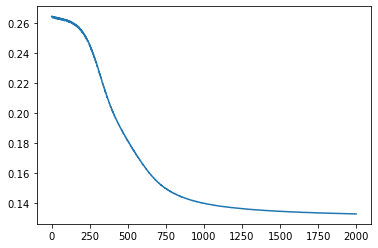

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.show

> 처음에는 손실이 점점 감소하다가 어느 시점부터 급격히 감소하고 나중에는 거의 감소하지 않는 S자 곡선을 그린다.
>
> 손실을 시각화하면 **네트워크 학습 현황을 한눈에 파악**할 수 있다.

* y축: loss vs x축: 학습 횟수 (y의 길이)
* plt.plot()에 하나의 변수만 전달하면 그 변수를 y로 간주하고 x는 자동으로 range(len(y))에 해당하는 값을 넣어 그래프를 만든다.